## Plot #1: Deaths by USA County

### Variable dot size (size depends on death column such that more deaths = bigger dot)

#### Data set up

In [127]:
# Get relevant libraries 
import pandas as pd
import os

In [2]:
# Look at current dir and switch to the one of choice
os.getcwd()
os.chdir('/Users/matic/Documents/School/Oxford/Wellcome Hackathon/GitHub/data')

In [128]:
# Load in the relevant dfs
methane_df = pd.read_csv('Methane.txt', delimiter='\t')
mh_df = pd.read_csv('MentalHealth.txt', delimiter='\t')
respiratory_df = pd.read_csv('Respiratory.txt', delimiter='\t')

# Add identifiers to each df
methane_df['ID'] = 'methane'
mh_df['ID'] = 'mh'
respiratory_df['ID'] = 'respiratory'

# Merge dfs to one 
health_df = pd.concat([methane_df, mh_df, respiratory_df], axis=0, ignore_index=True)

#### Get USA County Coordinates

#### Use geopy library to generate map!

In [129]:
import geopandas as gpd
import matplotlib.pyplot as plt
import geopy
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import pandas as pd

In [130]:
geolocator = Nominatim(user_agent="my_geocoder")

In [131]:
def get_coordinates(county):
    try:
        location = geolocator.geocode(county)
        return location.latitude, location.longitude
    except GeocoderTimedOut:
        return get_coordinates(county)

In [54]:
county_names = health_df["County"].unique()
county_names = county_names.tolist()

coordinates = []
for county in county_names:
    try:
        lat, lon = get_coordinates(county)
        coordinats.append((county, lat, lon))
    except AttributeError:
        print(f"Invalid county name: {county}. Skipping...")
        
        
# Invalid county name: Hoonah-Angoon Census Area, AK. Skipping...
# Invalid county name: Petersburg Borough/Census Area, AK. Skipping...
# Invalid county name: De Kalb County, IN. Skipping...
# Invalid county name: Ste. Genevieve County, MO. Skipping...
# Invalid county name: Bethel Census Area, AK. Skipping...
# Invalid county name: Prince of Wales-Hyder Census Area, AK. Skipping...
# Invalid county name: Southeast Fairbanks Census Area, AK. Skipping...
# Invalid county name: Valdez-Cordova Census Area, AK. Skipping...
# Invalid county name: Yukon-Koyukuk Census Area, AK. Skipping...

In [62]:
df_coordinates = pd.DataFrame(coordinates, columns=['County', 'Latitude', 'Longitude'])

#### Manually do the ones that failed/where geopy failed me

In [79]:
# manually get the rest of the coordinates because geopy failed me 
additional = 
[['Buena Vista city, VA', -79.3524, 37.7348],
['Charlottesville city, VA', -78.4767, 38.0293],
['Colonial Heights city, VA', -77.4086, 37.2440],
['Covington city, VA', -79.9916, 37.7840],
['Emporia city, VA', -77.5425, 36.6966],
['Falls Church city, VA', -77.1711, 38.8823],
['Franklin city, VA', -76.9366, 36.6844],
['Galax city, VA', -80.9170, 36.6658],
['Harrisonburg city, VA', -78.8689, 38.4496],
['Lexington city, VA', -79.4428, 37.7840],
['Manassas Park city, VA', -77.4525, 38.7726],
['Norton city, VA', -82.6281, 36.9323],
['Poquoson city, VA', -76.3488, 37.1224],
['Radford city, VA', -80.5764, 37.1206],
['Staunton city, VA', -79.0717, 38.1496],
['Waynesboro city, VA', -78.8867, 38.0685],
['Williamsburg city, VA', -76.7085, 37.2707],
['Adams County, WA', -118.4731, 46.9906],
['Asotin County, WA', -117.1965, 46.1902],
['Ferry County, WA', -118.5463, 48.4690],
['Klickitat County, WA', -120.7752, 45.8738],
['Lincoln County, WA', -118.4148, 47.5796],
['Pacific County, WA', -123.8380, 46.5267],
['Pend Oreille County, WA', -117.2664, 48.5252],
['San Juan County, WA', -123.0118, 48.6006],
['Skamania County, WA', -121.9169, 46.0240],
['Whitman County, WA', -117.5244, 46.8930],
['Doddridge County, WV', -80.7072, 39.2670],
['Pendleton County, WV', -79.3634, 38.7058],
['Pleasants County, WV', -81.1703, 39.3581],
['Pocahontas County, WV', -80.0388, 38.3719],
['Ritchie County, WV', -81.0976, 39.2111],
['Roane County, WV', -81.3972, 38.7490],
['Tucker County, WV', -79.6430, 39.1128],
['Tyler County, WV', -80.8982, 39.4393],
['Webster County, WV', -80.4366, 38.4812],
['Wirt County, WV', -81.4142, 39.0423],
['Bayfield County, WI', -91.1690, 46.484],
 ['Buffalo County, WI', -91.7501, 44.3638],
['Burnett County, WI', -92.3632, 45.8685],
['Clark County, WI', -90.5943, 44.7342],
['Crawford County, WI', -90.9500, 43.2304],
['Door County, WI', -87.0524, 45.0428],
['Dunn County, WI', -91.8952, 44.9517],
['Florence County, WI', -88.4004, 45.8415],
['Forest County, WI', -88.7820, 45.6526],
['Grant County, WI', -90.7012, 42.8624],
['Green County, WI', -89.5996, 42.6793],
['Green Lake County, WI', -89.0198, 43.8108],
['Iowa County, WI', -90.1384, 43.0013],
['Iron County, WI', -90.4620, 46.3145],
['Kewaunee County, WI', -87.6137, 44.4735],
['Lafayette County, WI', -90.1534, 42.6659],
['Langlade County, WI', -89.1044, 45.2407],
['Lincoln County, WI', -89.7229, 45.3565],
['Marquette County, WI', -89.4056, 43.8116],
['Menominee County, WI', -88.7634, 44.9084],
['Oneida County, WI', -89.4952, 45.7074],
['Pepin County, WI', -92.0010, 44.6121],
['Pierce County, WI', -92.4102, 44.7243],
['Polk County, WI', -92.3835, 45.4694],
['Price County, WI', -90.3893, 45.7003],
['Richland County, WI', -90.4471, 43.3813],
['Rusk County, WI', -91.1122, 45.4689],
['Taylor County, WI', -90.5306, 45.2272],
['Trempealeau County, WI', -91.3476, 44.3070],
['Vernon County, WI', -90.8498, 43.5884],
['Vilas County, WI', -89.3088, 46.0519],
['Washburn County, WI', -91.8117, 45.8526],
['Waushara County, WI', -89.2524, 44.1129],
['Albany County, WY', -105.7529, 41.6511],
['Big Horn County, WY', -107.9694, 44.5232],
['Carbon County, WY', -107.3170, 41.7036],
['Converse County, WY', -105.5342, 42.9949],
['Goshen County, WY', -104.3835, 42.0822],
['Johnson County, WY', -106.5970, 44.0494],
 ['Lincoln County, WY', -110.5667, 42.8333],
['Park County, WY', -109.5967, 44.5236],
['Platte County, WY', -104.7000, 42.1000],
['Sheridan County, WY', -107.0336, 44.8667],
['Sublette County, WY', -109.9154, 42.8500],
['Teton County, WY', -110.5885, 43.8537],
['Uinta County, WY', -110.9649, 41.2833],
['Washakie County, WY', -107.6780, 43.9167],
['Weston County, WY', -104.5321, 43.9167],
['Crowley County, CO', -103.7833, 38.3333],
['Clinch County, GA', -82.8790, 30.9632],
['Echols County, GA', -83.0922, 30.6976],
['Lincoln County, GA', -82.4346, 33.7914],
['Pulaski County, GA', -83.4994, 32.2304],
['Stewart County, GA', -84.8429, 32.0886],
['Talbot County, GA', -84.5333, 32.7167],
['Taliaferro County, GA', -82.8982, 33.5471],
['Butte County, ID', -113.1761, 43.6283],
['Pope County, IL', -88.5167, 37.4000],
['Gove County, KS', -100.4722, 38.8833],
['Haskell County, KS', -100.8833, 37.5500],
['Wichita County, KS', -101.3667, 38.4500],
['Robertson County, KY', -84.1461, 38.5837],
['Tensas Parish, LA', -91.3247, 32.0112],
['Sharkey County, MS', -90.8275, 32.9264],
['Tunica County, MS', -90.3749, 34.6498],
['Knox County, MO', -92.1513, 40.1392],
['Mercer County, MO', -93.5644, 40.4211],
['Wheatland County, MT', -109.9603, 46.4609],
['Garden County, NE', -102.3406, 41.5962],
['Hitchcock County, NE', -101.0000, 40.1833],
['Perkins County, NE', -101.6167, 40.8500],
['Valley County, NE', -99.8500, 41.4000],
['Union County, NM', -103.4319, 36.5181],
['Sargent County, ND', -97.6358, 46.1071],
['Sioux County, ND', -101.0722, 46.1000],
['Cimarron County, OK', -102.6000, 36.7800],
['Roger Mills County, OK', -99.6608, 35.6583],
['Aurora County, SD', -98.5256, 43.7128],
['Hyde County, SD', -99.4028, 44.5413],
['Mellette County, SD', -100.7339, 43.5333],
['Stanley County, SD', -100.7761, 44.4089],
['Ziebach County, SD', -101.9072, 45.0167],
['Bailey County, TX', -102.8319, 34.0511],
['Baylor County, TX', -99.2400, 33.5800],
['Carson County, TX', -101.3742, 35.4000],
['Castro County, TX', -102.2500, 34.5167],
['Crockett County, TX', -101.3981, 30.8248],
['Crosby County, TX', -101.3817, 33.6258],
['Foard County, TX', -99.7794, 33.9836],
['Hemphill County, TX', -100.2583, 35.8167],
['Kimble County, TX', -99.7436, 30.4770],
['Knox County, TX', -99.7389, 33.6044],
['Lipscomb County, TX', -100.2661, 36.2833],
['Lynn County, TX', -101.7008, 33.1636],
['Reagan County, TX', -101.4903, 31.3204],
['Upton County, TX', -102.4333, 31.4333],
['Piute County, UT', -112.1115, 38.2667],
['Columbia County, WA', -117.9278, 46.3025],
['Wahkiakum County, WA', -123.4250, 46.2947],
['Gilmer County, WV', -80.8675, 38.9053],
['Niobrara County, WY', -104.4736, 43.1667],
['Hoonah-Angoon Census Area, AK', -135.3500, 58.1000],
['Petersburg Borough/Census Area, AK', -132.8339, 56.8122],
['De Kalb County, IN', -85.0067, 41.4073],
['Ste. Genevieve County, MO', -90.1667, 37.9167],
['Bethel Census Area, AK', -161.5142, 60.6890],
['Prince of Wales-Hyder Census Area, AK', -132.8961, 55.6247],
['Southeast Fairbanks Census Area, AK', -142.0675, 63.7361],
['Valdez-Cordova Census Area, AK', -144.7630, 61.4272],
['Yukon-Koyukuk Census Area, AK', -153.2211, 65.0319]]

In [84]:
# swap longitude and latitude to match rest of coordinates
for item in additional:
    item[-2], item[-1] = item[-1], item[-2]
    
# clean up the data frame
df_additional = pd.DataFrame(additional, columns=['County', 'Latitude', 'Longitude'])

final_coordinates = pd.concat([df_coordinates, df_additional], ignore_index = True)

df = pd.merge(health_df, df_coordinates, on='County')

# filter datafame by ignoring deaths <= 9 or NaN
# also drop rows where County is nan
df = df.dropna(subset=['County'])
df = df.dropna(subset=['Deaths'])
df = df[df['Deaths'] >= 10]

# Renaming content and columns
df['ID'] = df['ID'].replace({'mh': 'Mental Health-related',
                             'respiratory': 'Respiratory Disease',
                             'methane': 'Methane/Gas-related'})

df = df.rename(columns={'ID': 'Cause of Death'})

#df.to_csv("final_health_data.csv")

In [132]:
# read the file here to avoid doing all the previous steps
df = pd.read_csv("final_health_data.csv")

In [133]:
import plotly.express as px
import pandas as pd

# Assuming you have the data in a DataFrame called 'df'
fig = px.scatter_mapbox(df, lat="Latitude", lon="Longitude", hover_name="County",
                        color="Cause of Death", size="Deaths",
                        color_continuous_scale=[[0, "rgb(68, 1, 84)"],
                                                [0.25, "rgb(72, 35, 116)"],
                                                [0.5, "rgb(64, 67, 135)"],
                                                [0.75, "rgb(52, 94, 141)"],
                                                [1, "rgb(41, 121, 142)"]],
                        mapbox_style="carto-positron",
                        zoom=3, center={"lat": 37.0902, "lon": -95.7129},
                        opacity=0.8, size_max=30)

fig.update_layout(title="Number of Deaths by Cause of Death in USA Counties",
                  height=600, width=900)

fig.show()

In [129]:
import plotly.io as pio

# Assuming you have the plot stored in the 'fig' variable
pio.write_html(fig, "USA_Deaths.html")

In [131]:
df.to_csv('final_health_data.csv', index = False)

#### Now the same plot but with consistent (not variable) dot size

In [134]:
import plotly.express as px
import pandas as pd

# Assuming you have the data in a DataFrame called 'df'
df['dot_size'] = 1  # Create a new column with a constant value for dot size

fig = px.scatter_mapbox(df, lat="Latitude", lon="Longitude", hover_name="County",
                        color="Cause of Death", size="dot_size",
                        color_continuous_scale=[[0, "rgb(68, 1, 84)"],
                                                [0.25, "rgb(72, 35, 116)"],
                                                [0.5, "rgb(64, 67, 135)"],
                                                [0.75, "rgb(52, 94, 141)"],
                                                [1, "rgb(41, 121, 142)"]],
                        mapbox_style="carto-positron",
                        zoom=3, center={"lat": 37.0902, "lon": -95.7129},
                        opacity=0.8, size_max=5)

fig.update_layout(title="Number of Deaths by Cause of Death in USA Counties",
                  height=600, width=900)

fig.show()


In [137]:
pio.write_html(fig, "USA_Deaths_constSize.html")

## Plot #2: Trend of deaths for different days of the week

##### use case: e.g., data might show more deaths on weekdays as opposed to weekends when factories may operate less

In [86]:
# Load in the relevant dfs
methane_df = pd.read_csv('Weekday_Methane.txt', delimiter='\t')
mh_df = pd.read_csv('Weekday_MentalHealth.txt', delimiter='\t')
respiratory_df = pd.read_csv('Weekday_Respiratory.txt', delimiter='\t')

# Add identifiers to each df
methane_df['ID'] = 'methane'
mh_df['ID'] = 'mh'
respiratory_df['ID'] = 'respiratory'

# Merge dfs to one 
weekday_health_df = pd.concat([methane_df, mh_df, respiratory_df], axis=0, ignore_index=True)

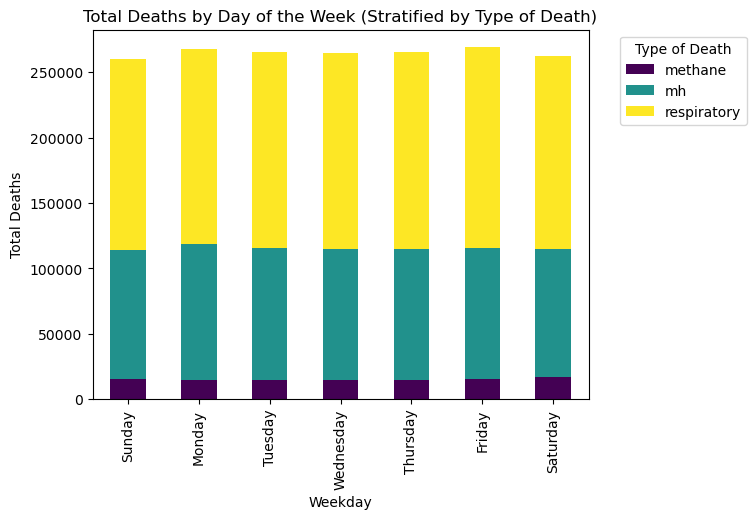

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Filter observations with deaths >= 10
weekday_health_df = weekday_health_df[weekday_health_df['Deaths'] >= 10]

# Create a mapping for ordering the days cyclically
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Filter and order the days of the week
weekday_health_df = weekday_health_df[weekday_health_df['Weekday'].isin(day_order)]
weekday_health_df['Weekday'] = pd.Categorical(weekday_health_df['Weekday'], categories=day_order, ordered=True)

deaths_by_day_id = weekday_health_df.groupby(['Weekday', 'ID'])['Deaths'].sum()
deaths_by_day_id = deaths_by_day_id.unstack()

# Re-name content in ID column for a more informative legend
weekday_health_df['ID'] = weekday_health_df['ID'].replace({'mh': 'Mental Health-related',
                                                             'respiratory': 'Respiratory Disease',
                                                             'methane': 'Methane/Gas-related'})

# Define the color map using Viridis
cmap = cm.get_cmap('viridis')

deaths_by_day_id.plot(kind='bar', stacked=True, colormap=cmap)

plt.xlabel('Weekday')
plt.ylabel('Total Deaths')
plt.title('Total Deaths by Day of the Week (Stratified by Type of Death)')
plt.legend(title='Type of Death', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig('deaths_byWeekday.png', bbox_inches='tight')  # Replace 'output_plot.png' with the desired file name and extension

plt.show()

In [88]:
weekday_health_df.to_csv('weekday_health_df.csv', index=False)

## Plot #3: Death trends over time

### Plot 3a: First the general trend across years (basic plot)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load in the relevant dfs
methane_df = pd.read_csv('Year_Methane.txt', delimiter='\t')
mh_df = pd.read_csv('Year_MentalHealth.txt', delimiter='\t')
respiratory_df = pd.read_csv('Year_Respiratory.txt', delimiter='\t')

# Add identifiers to each df
methane_df['ID'] = 'methane'
mh_df['ID'] = 'mh'
respiratory_df['ID'] = 'respiratory'

# Merge dfs to one 
year_health_df = pd.concat([methane_df, mh_df, respiratory_df], axis=0, ignore_index=True)

In [5]:
methane_deaths_by_year = methane_df.groupby('Year')['Deaths'].sum()
mh_deaths_by_year = mh_df.groupby('Year')['Deaths'].sum()
respiratory_deaths_by_year = respiratory_df.groupby('Year')['Deaths'].sum()

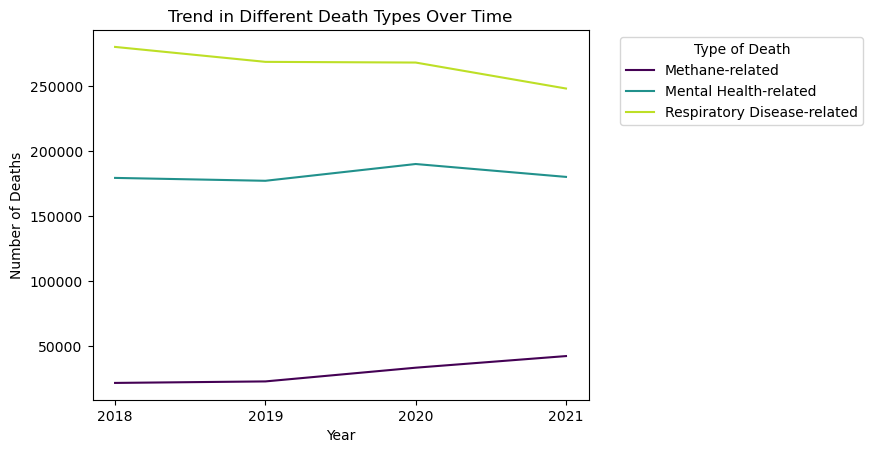

In [6]:
# Set up the figure and axes
fig, ax = plt.subplots()

# Set the x-axis ticks
years = [2018, 2019, 2020, 2021]
plt.xticks(years)

# Get the "viridis" colormap
cmap = plt.get_cmap('viridis')

# Plot the data with the "viridis" color map
ax.plot(methane_deaths_by_year.index, methane_deaths_by_year, label='Methane-related', color=cmap(0.0))
ax.plot(mh_deaths_by_year.index, mh_deaths_by_year, label='Mental Health-related', color=cmap(0.5))
ax.plot(respiratory_deaths_by_year.index, respiratory_deaths_by_year, label='Respiratory Disease-related', color=cmap(0.9))

# Customize the plot
ax.set_xlabel('Year')
ax.set_ylabel('Number of Deaths')
ax.set_title('Trend in Different Death Types Over Time')
plt.legend(title='Type of Death', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig('yearly_deathTrends.png', bbox_inches='tight')  # Replace 'output_plot.png' with the desired file name and extension

# Show the plot
plt.show()

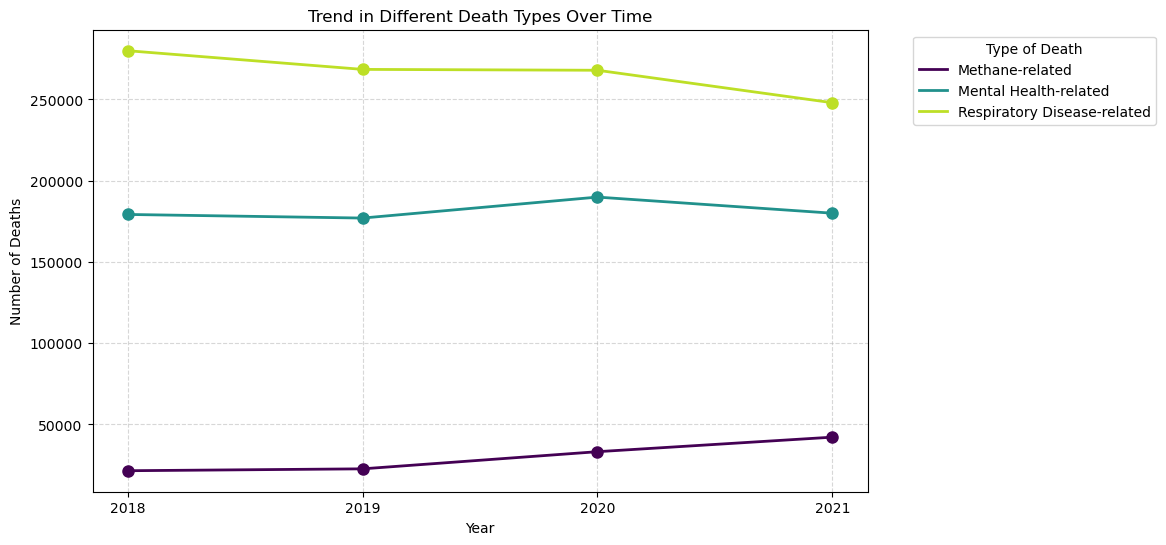

In [8]:
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Set the x-axis ticks
years = [2018, 2019, 2020, 2021]
plt.xticks(years)

# Get the "viridis" colormap
cmap = plt.get_cmap('viridis')

# Plot the data with the "viridis" color map and thicker lines
ax.plot(methane_deaths_by_year.index, methane_deaths_by_year, label='Methane-related', linewidth=2, color=cmap(0.0))
ax.plot(mh_deaths_by_year.index, mh_deaths_by_year, label='Mental Health-related', linewidth=2, color=cmap(0.5))
ax.plot(respiratory_deaths_by_year.index, respiratory_deaths_by_year, label='Respiratory Disease-related', linewidth=2, color=cmap(0.9))

# Add markers to the data points
ax.plot(methane_deaths_by_year.index, methane_deaths_by_year, 'o', markersize=8, color=cmap(0.0))
ax.plot(mh_deaths_by_year.index, mh_deaths_by_year, 'o', markersize=8, color=cmap(0.5))
ax.plot(respiratory_deaths_by_year.index, respiratory_deaths_by_year, 'o', markersize=8, color=cmap(0.9))

# Customize the plot
ax.set_xlabel('Year')
ax.set_ylabel('Number of Deaths')
ax.set_title('Trend in Different Death Types Over Time')

# Add a grid for better readability
ax.grid(True, linestyle='--', alpha=0.5)

# Adjust the legend position
plt.legend(title='Type of Death', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


### Plot 3b: Year and months (hover feature)"

### first just health data

# TO DO: DROPDOWN FOR COUNTY

In [112]:
# load data
month_health_df = pd.read_csv("month_health_df.csv")

In [113]:
# alter the mh ID to be "mental health"
month_health_df['ID'] = month_health_df['ID'].replace('mh', 'mental health')

In [118]:
import pandas as pd
import plotly.graph_objects as go
import plotly.colors as colors

# Filter the data by the desired ID (methane, mh, respiratory)
desired_id = 'methane'  # Replace with the desired ID
filtered_data = month_health_df[month_health_df['ID'] == desired_id]

# Group the data by Year and Month, and calculate the total deaths for each combination
grouped_data = filtered_data.groupby(['Year', 'Month'])['Deaths'].sum().reset_index()

# Define the desired order of months
month_order = ['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'Jun.', 'Jul.', 'Aug.', 'Sep.', 'Oct.', 'Nov.', 'Dec.']

# Convert the 'Month' column to categorical with the desired order
grouped_data['Month'] = pd.Categorical(grouped_data['Month'], categories=month_order, ordered=True)

# Sort the data by Year and Month
grouped_data = grouped_data.sort_values(['Year', 'Month'])

# Create the x-axis tick labels as month and year combinations
x_ticks = [f'{month} {int(year)}' for year, month in zip(grouped_data['Year'], grouped_data['Month'])]

# Create the hovertemplate with only the month, year, and number of deaths
hovertemplate = 'Year: %{x}<br>Month: %{text}<br>Number of Deaths: %{y}'

# Get the viridis color scale
viridis_colors = colors.sequential.Viridis

# Create the line plot using Plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=x_ticks, y=grouped_data['Deaths'],
                         mode='lines+markers', hovertemplate=hovertemplate,
                         line={'color': viridis_colors[0]},
                         text=grouped_data['Month']))  # Use the Month column for hover text

# Set the plot title and labels
fig.update_layout(
    title=f'Trend in Number of Deaths ({desired_id.capitalize()}-related) Over Time',
    xaxis_title='Year',
    yaxis_title='Number of Deaths'
)

fig.update_xaxes(
    tickmode='array',
    tickvals=[idx for idx, month in enumerate(grouped_data['Month']) if month == 'Jan.'],
    ticktext=[str(int(year)) for year, month in zip(grouped_data['Year'], grouped_data['Month']) if month == 'Jan.'],
    tickformat='.0f'
)

# Remove the trace name from the legend
fig.update_traces(name='')

# Show the plot
fig.show()


### now methane data (2018-2021)

In [80]:
month_methane_df = pd.read_csv("methane_monthly_county.csv")

In [81]:
# Get FIPS codes for the counties for future use / merging 
import geopandas as gpd
from shapely.geometry import Point

# Create a GeoDataFrame with Point geometries from longitude and latitude
geometry = [Point(lon, lat) for lon, lat in zip(month_methane_df['longitude'], month_methane_df['latitude'])]
gdf = gpd.GeoDataFrame(month_methane_df, geometry=geometry, crs='EPSG:4326')

# GeoJSON file URL
geojson_url = 'https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json'  # Replace with the actual GeoJSON file URL

# Load the GeoJSON file containing county boundaries
county_geojson = gpd.read_file(geojson_url)

# Perform spatial join to obtain FIPS codes
joined_data = gpd.sjoin(gdf, county_geojson, how='left', op='within')

# Extract the FIPS codes and insert them into the dataframe
month_methane_df['FIPS'] = joined_data['id'].tolist()


/Users/matic/opt/anaconda3/envs/WellcomeHackathon/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3445: FutureWarning:

The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.



In [82]:
# Get Month and Year information for plotting purposes 
import pandas as pd

# Convert 'Date' column to datetime format
month_methane_df['date'] = pd.to_datetime(month_methane_df['date'])

# Extract year and month into separate columns
month_methane_df['Year'] = month_methane_df['date'].dt.strftime('%Y')
month_methane_df['Month'] = month_methane_df['date'].dt.strftime('%b.')

# Only reatain 2018-2019 data to match health data
years_to_keep = ['2018', '2019', '2020', '2021']
month_methane_df = month_methane_df[month_methane_df["Year"].isin(years_to_keep)]

In [98]:
# Drop nan dates
month_methane_df = month_methane_df.dropna(subset=["ch4"])
month_methane_df = month_methane_df.dropna(subset=["Year"])
month_methane_df = month_methane_df.dropna(subset=["Month"])

In [99]:
import pandas as pd
import plotly.graph_objects as go
import plotly.colors as colors

# Filter the data by the desired ID (methane, mh, respiratory)
desired_id = 'methane'  # Replace with the desired ID
filtered_data = month_methane_df

# Group the data by Year and Month, and calculate the total deaths for each combination
grouped_data = filtered_data.groupby(['Year', 'Month'])['ch4'].sum().reset_index()

# Define the desired order of months
month_order = ['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'Jun.', 'Jul.', 'Aug.', 'Sep.', 'Oct.', 'Nov.', 'Dec.']

# Convert the 'Month' column to categorical with the desired order
grouped_data['Month'] = pd.Categorical(grouped_data['Month'], categories=month_order, ordered=True)

# Sort the data by Year and Month
grouped_data = grouped_data.sort_values(['Year', 'Month'])

# Create the x-axis tick labels as month and year combinations
x_ticks = [f'{month} {int(year)}' for year, month in zip(grouped_data['Year'], grouped_data['Month'])]

# Create the hovertemplate with only the month, year, and number of deaths
hovertemplate = 'Year: %{x}<br>Month: %{text}<br>Number of Methane Emissions: %{y}'

# Get the viridis color scale
viridis_colors = colors.sequential.Viridis

# Create the line plot using Plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=x_ticks, y=grouped_data['ch4'],
                         mode='lines+markers', hovertemplate=hovertemplate,
                         line={'color': viridis_colors[0]},
                         text=grouped_data['Month']))  # Use the Month column for hover text

# Set the plot title and labels
fig.update_layout(
    title=f'Trend in Methane Emissions Over Time',
    xaxis_title='Year',
    yaxis_title='Methane Emissions'
)

fig.update_xaxes(
    tickmode='array',
    tickvals=[idx for idx, month in enumerate(grouped_data['Month']) if month == 'Jan.'],
    ticktext=[str(int(year)) for year, month in zip(grouped_data['Year'], grouped_data['Month']) if month == 'Jan.'],
    tickformat='.0f'
)

# Remove the trace name from the legend
fig.update_traces(name='')

# Show the plot
fig.show()


### Now methane and health data combined 

In [111]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.colors as colors

# Filter the data by the desired ID (methane, mh, respiratory)
desired_id = 'methane'  # Replace with the desired ID
filtered_data1 = month_health_df[month_health_df['ID'] == desired_id]
filtered_data2 = month_methane_df

# Group the data by Year and Month, and calculate the total deaths for each combination
grouped_data1 = filtered_data1.groupby(['Year', 'Month'])['Deaths'].sum().reset_index()
grouped_data2 = filtered_data2.groupby(['Year', 'Month'])['ch4'].sum().reset_index()

# Define the desired order of months
month_order = ['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'Jun.', 'Jul.', 'Aug.', 'Sep.', 'Oct.', 'Nov.', 'Dec.']

# Convert the 'Month' column to categorical with the desired order
grouped_data1['Month'] = pd.Categorical(grouped_data1['Month'], categories=month_order, ordered=True)
grouped_data2['Month'] = pd.Categorical(grouped_data2['Month'], categories=month_order, ordered=True)

# Sort the data by Year and Month
grouped_data1 = grouped_data1.sort_values(['Year', 'Month'])
grouped_data2 = grouped_data2.sort_values(['Year', 'Month'])

# Create the x-axis tick labels as month and year combinations
x_ticks = [f'{month} {int(year)}' for year, month in zip(grouped_data1['Year'], grouped_data1['Month'])]

# Create the hovertemplate with only the month, year, and number of deaths
hovertemplate1 = 'Year: %{x}<br>Month: %{text}<br>Number of Deaths: %{y}'
hovertemplate2 = 'Year: %{x}<br>Month: %{text}<br>Number of Methane Emissions: %{y}'

# Get the viridis color scale
viridis_colors = colors.sequential.Viridis

# Create the subplots with two y-axes
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add the line plots to the figure
fig.add_trace(
    go.Scatter(x=x_ticks, y=grouped_data1['Deaths'], mode='lines+markers',
               hovertemplate=hovertemplate1, line={'color': viridis_colors[0]}, text=grouped_data1['Month']),
    secondary_y=False
)
fig.add_trace(
    go.Scatter(x=x_ticks, y=grouped_data2['ch4'], mode='lines+markers',
               hovertemplate=hovertemplate2, line={'color': viridis_colors[4]}, text=grouped_data2['Month']),
    secondary_y=True
)

# Set the plot title and labels
fig.update_layout(
    title='Trend in Number of Deaths and Methane Emissions Over Time',
    xaxis_title='Year',
    yaxis=dict(title='Number of Deaths', color=viridis_colors[0]),
    yaxis2=dict(title='Methane Emissions', color=viridis_colors[4]),
    legend=dict(
        x=0.75,
        y=1,
        traceorder='normal',
        bgcolor='rgba(0,0,0,0)',
        bordercolor='rgba(0,0,0,0)'
    )
)

fig.update_xaxes(
    tickmode='array',
    tickvals=[idx for idx, month in enumerate(grouped_data1['Month']) if month == 'Jan.'],
    ticktext=[str(int(year)) for year, month in zip(grouped_data1['Year'], grouped_data1['Month']) if month == 'Jan.'],
    tickformat='.0f'
)

# Remove the trace names from the legend
fig.update_traces(name='', showlegend=False)

# Show the plot
fig.show()


## Plot #4: Deaths by county and by month

In [121]:
import pandas as pd
import plotly.express as px

In [123]:
# Load in the relevant dfs
methane_df = pd.read_csv('Month_Methane.txt', delimiter='\t')
mh_df_1 = pd.read_csv('20182019_Month_MentalHealth.txt', delimiter='\t')
mh_df_2 = pd.read_csv('20202021_Month_MentalHealth.txt', delimiter='\t')
respiratory_df_1 = pd.read_csv('2018_Month_Respiratory.txt', delimiter='\t')
respiratory_df_2 = pd.read_csv('20192020_Month_Respiratory.txt', delimiter='\t')
respiratory_df_3 = pd.read_csv('2021_Month_Respiratory.txt', delimiter='\t')

# Add identifiers to each df
methane_df['ID'] = 'methane'
mh_df_1['ID'] = 'mh'
mh_df_2['ID'] = 'mh'
respiratory_df_1['ID'] = 'respiratory'
respiratory_df_2['ID'] = 'respiratory'
respiratory_df_3['ID'] = 'respiratory'

respiratory_df_1['Year'] = 2018

# Merge dfs to one 
mh_df = pd.concat([mh_df_1, mh_df_2], axis=0, ignore_index=True)
respiratory_df = pd.concat([respiratory_df_1, respiratory_df_2, respiratory_df_3], axis=0, ignore_index=True)
month_health_df = pd.concat([methane_df, mh_df, respiratory_df], axis=0, ignore_index=True)

# Convert Month column to proper format
month_health_df['Month'] = month_health_df['Month'].str.split(',').str[0].str.strip()

In [124]:
# drop montha and county that are nan and deaths that are < 10
month_health_df = month_health_df.dropna(subset=['Month', 'County']).query('Deaths >= 10')

In [125]:
# Convert the 'Month' column to a categorical data type to ensure correct ordering
month_health_df['Month'] = pd.Categorical(month_health_df['Month'], categories=['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'Jun.', 'Jul.', 'Aug.', 'Sep.', 'Oct.', 'Nov.', 'Dec.'], ordered=True)

In [126]:
fig = px.scatter(month_health_df, x='Month', y='Deaths', color='County', symbol='County', 
                 color_continuous_scale='viridis', title='Number of Deaths by County by Month',
                 category_orders={'Month': ['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'Jun.', 'Jul.', 'Aug.', 'Sep.', 'Oct.', 'Nov.', 'Dec.']})

fig.update_layout(xaxis_title='Month', yaxis_title='Deaths')

fig.update_layout(
    annotations=[
        dict(
            x=0,
            y=1.1,
            xref="paper",
            yref="paper",
            text="Cause of death: Mental health-related, respiratory disease-related, or methane/gas-related",
            showarrow=False,
            font=dict(size=10),
            align="center"
        )
    ]
)
fig.show()

In [80]:
import plotly.io as pio

fig = px.scatter(month_health_df, x='Month', y='Deaths', color='County', symbol='County', 
                 color_continuous_scale='viridis', title='Number of Deaths by County by Month',
                 category_orders={'Month': ['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'Jun.', 'Jul.', 'Aug.', 'Sep.', 'Oct.', 'Nov.', 'Dec.']})

fig.update_layout(xaxis_title='Month', yaxis_title='Deaths')

fig.update_layout(
    annotations=[
        dict(
            x=0,
            y=1.05,
            xref="paper",
            yref="paper",
            text="Cause of death: Mental health-related, respiratory disease-related, or methane/gas-related",
            showarrow=False,
            font=dict(size=10),
            align="center"
        )
    ]
)

# Save the plot as HTML
pio.write_html(fig, 'deaths_byMonth_byCounty.html')

In [81]:
month_health_df.to_csv('month_health_df.csv', index=False)

## Plot #5: Investigating illness differences by race 

# TO DO: ADD DROP DOWN FOR PER COUNTY

In [119]:
import numpy as np
import plotly.graph_objects as go
import pandas as pd

# Load in the relevant dfs
methane_df = pd.read_csv('Race_Methane.txt', delimiter='\t')
mh_df = pd.read_csv('Race_MentalHealth.txt', delimiter='\t')
respiratory_df = pd.read_csv('Race_Respiratory.txt', delimiter='\t')

# Add identifiers to each df
methane_df['ID'] = 'methane'
mh_df['ID'] = 'mh'
respiratory_df['ID'] = 'respiratory'

# Merge dfs to one 
race_health_df = pd.concat([methane_df, mh_df, respiratory_df], axis=0, ignore_index=True)

/var/folders/9x/mzy5y7vn06s46r3f60xxy7qw0000gp/T/ipykernel_82603/2658342407.py:36: UserWarning:

FixedFormatter should only be used together with FixedLocator



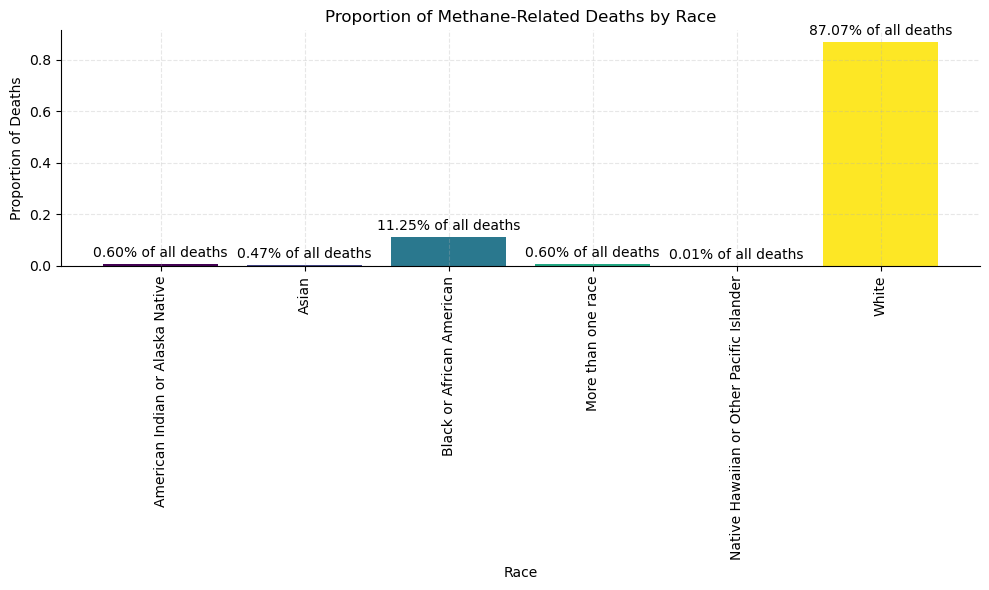

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Isolate just methane-related deaths here 
race_health_df_methane = race_health_df[race_health_df["ID"] == "methane"]

#### Filter by county if desired 
#county = "Calhoun County, AL"
#race_health_df_methane = race_health_df_methane[race_health_df_methane["County"] == county]

# Group the data by race and calculate the total deaths
race_deaths_agg = race_health_df_methane.groupby("Single Race 6")["Deaths"].sum().reset_index()

# Calculate the proportion of deaths for each race
total_deaths = race_deaths_agg["Deaths"].sum()
race_deaths_agg["Proportion of Deaths"] = race_deaths_agg["Deaths"] / total_deaths

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Generate colors using the Viridis color palette
viridis_colors = cm.viridis(np.linspace(0, 1, len(race_deaths_agg)))

# Plot the bars with different colors for each race
ax.bar(
    race_deaths_agg["Single Race 6"],
    race_deaths_agg["Proportion of Deaths"],
    color=viridis_colors,
)

ax.set_title("Proportion of Methane-Related Deaths by Race")
ax.set_xlabel("Race")
ax.set_ylabel("Proportion of Deaths")
ax.set_xticklabels(race_deaths_agg["Single Race 6"], rotation=90)
ax.grid(True, linestyle="--", alpha=0.3)

# Add annotations for each bar
for i, row in race_deaths_agg.iterrows():
    proportion_text = f"{row['Proportion of Deaths']:.2%} of all deaths"
    ax.annotate(
        proportion_text,
        xy=(row["Single Race 6"], row["Proportion of Deaths"]),
        xytext=(0, 5),
        textcoords="offset points",
        ha="center",
        color="black",
    )

# Remove the top and right spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Adjust the layout
plt.tight_layout()

# Save the figure
#plt.savefig("proportion_of_deaths_race_BarChart.png")

# Display the plot
plt.show()



## TESTING DASH (FAILED)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Group the data by race and calculate the total deaths
race_health_df_methane = race_health_df[race_health_df["ID"] == "methane"] # just methane-related deaths
race_deaths_agg = race_health_df_methane.groupby(["Single Race 6", "County"])["Deaths"].sum().reset_index()

In [6]:
import pandas as pd
import plotly.express as px
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

# Create the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    dcc.Dropdown(
        id='county-dropdown',
        options=[{'label': County, 'value': County} for County in test['County'].unique()],
        value=None,
        placeholder='Select a county',
        style={'width': '200px', 'margin-bottom': '20px'}
    ),
    dcc.Graph(
        id='scatter-plot'
    )
])

# Define the callback function to update the scatter plot based on the dropdown selection
@app.callback(
    Output('scatter-plot', 'figure'),
    [Input('county-dropdown', 'value')]
)
def update_scatter_plot(selected_county):
    if selected_county is None:
        filtered_df = race_deaths_agg
    else:
        filtered_df = race_deaths_agg[race_deaths_agg['County'] == selected_county]
        
        
    # Calculate the proportion of deaths for each race
    total_deaths = filtered_df["Deaths"].sum()
    filtered_df["Proportion of Deaths"] = filtered_df["Deaths"] / total_deaths

    # Create a bar chart
    fig, ax = plt.subplots(figsize=(10, 6))

    # Generate colors using the Viridis color palette
    viridis_colors = cm.viridis(np.linspace(0, 1, len(filtered_df)))

    # Plot the bars with different colors for each race
    ax.bar(
        filtered_df["Single Race 6"],
        filtered_df["Proportion of Deaths"],
        color=viridis_colors,
    )

    ax.set_title("Proportion of Methane-Related Deaths by Race")
    ax.set_xlabel("Race")
    ax.set_ylabel("Proportion of Deaths")
    ax.set_xticklabels(filtered_df["Single Race 6"], rotation=90)
    ax.grid(True, linestyle="--", alpha=0.3)

    # Add annotations for each bar
    for i, row in filtered_df.iterrows():
        print(row)
        proportion_text = f"{row['Proportion of Deaths']:.2%} of all deaths"
        ax.annotate(
            proportion_text,
            xy=(row["Single Race 6"], row["Proportion of Deaths"]),
            xytext=(0, 5),
            textcoords="offset points",
            ha="center",
            color="black",
        )

    # Remove the top and right spines
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    # Adjust the layout
    plt.tight_layout()
    
    return plt

# Run the app
if __name__ == '__main__':
    app.run_server(port = 8052, debug=True)

ImportError: cannot import name 'get_current_traceback' from 'werkzeug.debug.tbtools' (/Users/matic/opt/anaconda3/envs/WellcomeHackathon/lib/python3.9/site-packages/werkzeug/debug/tbtools.py)

## CODE HERE ON DOWN IS INCOMPLETE ##

In [135]:
# Fix the data frame as needed for the first plot!

# Drop rows with NaN or non-convertible values in the column
race_health_df = race_health_df.replace([np.inf, -np.inf], np.nan)  # Replace infinite values with NaN
race_health_df = race_health_df.dropna(subset=['County Code'], inplace=False)

# Convert the column to numeric (float) to handle NaN values
race_health_df['County Code'] = pd.to_numeric(race_health_df['County Code'], errors='coerce')

# Drop rows with non-convertible values (e.g., NaN, non-numeric values)
race_health_df = race_health_df.dropna(subset=['County Code'], inplace=False)

# Convert the column to str to enable next part
race_health_df['County Code'] = race_health_df['County Code'].astype(int)
race_health_df['County Code'] = race_health_df['County Code'].astype(str)

# Check the format of values in the column
# ensure that all FIPS that are 4 digits in length start with the 0 as per FIPS format
for index, value in race_health_df['County Code'].items():
    if len(race_health_df['County Code'][index]) < 5:
        race_health_df.loc[index, 'County Code'] = race_health_df.loc[index, 'County Code'].zfill(5)
        
# Create state column
race_health_df['State'] = race_health_df['County'].str.rsplit(', ', n=1).str[1]

race_deaths_agg = race_health_df.groupby(["Single Race 6", "County", "County Code"])["Deaths"].sum().reset_index()
# Convert the column to str to enable next part
race_deaths_agg['County Code'] = race_deaths_agg['County Code'].astype(int)
race_deaths_agg['County Code'] = race_deaths_agg['County Code'].astype(str)

# Check the format of values in the column
# ensure that all FIPS that are 4 digits in length start with the 0 as per FIPS format
for index, value in race_deaths_agg['County Code'].items():
    if len(race_deaths_agg['County Code'][index]) < 5:
        race_deaths_agg.loc[index, 'County Code'] = race_deaths_agg.loc[index, 'County Code'].zfill(5)

In [136]:
import plotly.graph_objects as go
import pandas as pd
import plotly.io as pio


# Aggregate number of deaths for each race in a county
race_deaths_aggregated = race_deaths_agg.groupby('County Code').agg({'Deaths': 'sum', 'Single Race 6': lambda x: ', '.join(sorted(set(x))), 'County': 'first'}).reset_index()

# Create a choropleth map
fig = go.Figure(go.Choroplethmapbox(
    geojson='https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json',
    locations=race_deaths_aggregated['County Code'],
    z=race_deaths_aggregated['Deaths'],
    text=race_deaths_aggregated['Single Race 6'],
    customdata=race_deaths_aggregated['County'],
    colorscale='Viridis',
    colorbar_title='Number of Deaths',
    marker_opacity=0.5
))

# Update hovertemplate to display county name
fig.update_traces(hovertemplate='County: %{customdata}<br>Number of Deaths: %{z}<br>Race: %{text}<extra></extra>')

# Set the layout properties
fig.update_layout(
    title_text='Deaths across US Counties',
    title_x=0.5,
    mapbox=dict(
        center=dict(lat=37, lon=-95),
        zoom=3,
        style='carto-positron'
    )
)


# Display the plot
fig.show()


In [137]:
import plotly.graph_objects as go
import plotly.colors as colors
import pandas as pd
import plotly.io as pio

# Aggregate number of deaths for each race in a county
race_deaths_aggregated = race_health_df.groupby(['County Code', 'County', 'Single Race 6']).agg({'Deaths': 'sum'}).reset_index()

# Get the number of unique races
num_races = len(race_deaths_aggregated['Single Race 6'].unique())

# Generate a color scale based on the number of races using Viridis colors
color_scale = colors.sequential.Viridis

# Create a scatter plot
fig = go.Figure()

# Iterate over each race
for i, race in enumerate(race_deaths_aggregated['Single Race 6'].unique()):
    race_data = race_deaths_aggregated[race_deaths_aggregated['Single Race 6'] == race]
    fig.add_trace(go.Scatter(
        x=race_data['County'],
        y=race_data['Deaths'],
        mode='markers',
        text=race_data.apply(lambda x: f"County: {x['County']}<br>"
                                         f"Race: {x['Single Race 6']}<br>"
                                         f"Deaths: {x['Deaths']}<br>", axis=1),
        hoverinfo='text',
        marker=dict(size=8, opacity=0.8, color=color_scale[i * (len(color_scale) // num_races)]),
        name=race
    ))

# Set the layout properties
fig.update_layout(
    title='Number of Deaths by Race in Various Counties',
    xaxis=dict(showticklabels=False),
    yaxis=dict(title='Number of Deaths'),
    showlegend=True
)

# Display the plot
fig.show()
